In [2]:
import numpy as np
import pandas as pd

# Load the dataset
ratings_file = 'ratings.csv'
ratings = pd.read_csv(ratings_file)

books_file = 'books.csv'
books = pd.read_csv(books_file)

display(ratings.head())
display(books.head())

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [3]:
# book info
book_count = books.shape[0]
ratings_on_books = books['ratings_count'].sum()
most_ratings = books.iloc[books['ratings_count'].idxmax()]
fewest_ratings = books.iloc[books['ratings_count'].idxmin()]

highest_average_rating = books.iloc[books['average_rating'].idxmax()]
lowest_average_rating = books.iloc[books['average_rating'].idxmin()]

most_5_star_ratings = books.iloc[books['ratings_5'].idxmax()]
most_1_star_ratings = books.iloc[books['ratings_1'].idxmax()]

print('Total number of books in dataset: %s' % "{:,}".format(book_count))
print('Total number of ratings on books in dataset: %s' % "{:,}".format(ratings_on_books))
print('Book with most ratings: %s with %s ratings' % (most_ratings['title'], "{:,}".format(most_ratings['ratings_count'])))
print('Book with fewest ratings: %s with %s ratings' % (fewest_ratings['title'], "{:,}".format(fewest_ratings['ratings_count'])))
print('Book with highest average rating: %s with %s average' % (highest_average_rating['title'], highest_average_rating['average_rating']))
print('Book with lowest average rating: %s with %s average' % (lowest_average_rating['title'], lowest_average_rating['average_rating']))
print('Book with most 5-star ratings: %s with %s 5-star ratings' % (most_5_star_ratings['title'], "{:,}".format(most_5_star_ratings['ratings_5'])))
print('Book with most 1-star ratings: %s with %s 1-star ratings' % (most_1_star_ratings['title'], "{:,}".format(most_1_star_ratings['ratings_1'])))

Total number of books in dataset: 10,000
Total number of ratings on books in dataset: 540,012,351
Book with most ratings: The Hunger Games (The Hunger Games, #1) with 4,780,653 ratings
Book with fewest ratings: درخت زیبای من with 2,716 ratings
Book with highest average rating: The Complete Calvin and Hobbes with 4.82 average
Book with lowest average rating: One Night at the Call Center with 2.47 average
Book with most 5-star ratings: Harry Potter and the Sorcerer's Stone (Harry Potter, #1) with 3,011,543 5-star ratings
Book with most 1-star ratings: Twilight (Twilight, #1) with 456,191 1-star ratings


In [4]:
# ratings info
rating_count = ratings.shape[0]
percent_of_total = (rating_count / ratings_on_books) * 100

mean_rating = ratings['rating'].mean()
median_rating = ratings['rating'].median()

user_count = ratings['user_id'].nunique()
ratings_per_user = rating_count / user_count

print('Total number of ratings in dataset: %s' % "{:,}".format(rating_count))
print('Percent of total ratings included in this dataset: %s percent' % round(percent_of_total, 2))
print('Mean rating: %s' % round(mean_rating, 2))
print('Median rating: %s' % median_rating)
print('Total number of users in dataset: %s' % "{:,}".format(user_count))
print('Ratings per user: %s' % round(ratings_per_user, 2))

Total number of ratings in dataset: 5,976,479
Percent of total ratings included in this dataset: 1.11 percent
Mean rating: 3.92
Median rating: 4.0
Total number of users in dataset: 53,424
Ratings per user: 111.87


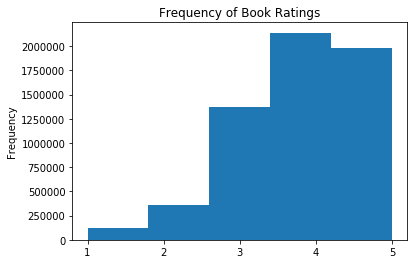

In [5]:
# Create a histogram of the ratings
ratings['rating'].plot(kind='hist', bins=5, xticks=[1,2,3,4,5], title='Frequency of Book Ratings')

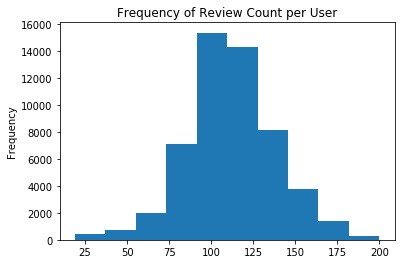

In [6]:
# Create a histogram of rating count per user
ratings['user_id'].value_counts().plot(kind='hist', title='Frequency of Review Count per User')

## Data preprocessing

In [7]:
# Merge the two tables then pivot so we have Users X Books dataframe. 
ratings_title = pd.merge(ratings, books[['book_id', 'title']], on='book_id' )
user_book_ratings = pd.pivot_table(ratings_title, index='user_id', columns= 'title', values='rating')

print('dataset dimensions: ', user_book_ratings.shape, '\n\nSubset example:')
user_book_ratings.iloc[:25, :10]

dataset dimensions:  (53424, 9964) 

Subset example:


title,"Angels (Walsh Family, #3)","""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",#GIRLBOSS,'Salem's Lot,"'Tis (Frank McCourt, #2)","1,000 Places to See Before You Die",1/4 جرام,"10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works","100 Bullets, Vol. 1: First Shot, Last Call",100 Love Sonnets
user_id,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To reduce the sparseness of the matrix and to make it easier to work with, I will drop books that have fewer than 300 ratings. In addition, I will drop users who have provided fewer than 100 ratings on these books. This results in a matrix with 4,167 books (about 41% of the original) and 21,093 users (about 39% of the original).

In [8]:
# Drop books that have fewer than 300 ratings.
user_book_ratings = user_book_ratings.dropna(axis='columns', thresh=300)
# Drop users that have given fewer than 100 ratings of these most-rated books
user_book_ratings = user_book_ratings.dropna(thresh=100)

print('dataset dimensions: ', user_book_ratings.shape, '\n\nSubset example:')
user_book_ratings.iloc[:25, :10]

dataset dimensions:  (21093, 4167) 

Subset example:


title,'Salem's Lot,"'Tis (Frank McCourt, #2)","1,000 Places to See Before You Die",100 Selected Poems,"10th Anniversary (Women's Murder Club, #10)",11/22/63,"11th Hour (Women's Murder Club, #11)","12th of Never (Women's Murder Club, #12)","13 Little Blue Envelopes (Little Blue Envelope, #1)",1491: New Revelations of the Americas Before Columbus
user_id,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To further reduce dimensionality, I will apply truncated SVD, which is available for sparse matrices. I've determined that if I use 200 features, these features will explain about 45 percent of the variance in the data. 

In [9]:
from sklearn.decomposition import TruncatedSVD

# replace NaN's with zeroes for Truncated SVD
user_book_ratings_without_nan = user_book_ratings.fillna(0)

tsvd = TruncatedSVD(n_components=200, random_state=42)
user_book_ratings_tsvd = tsvd.fit(user_book_ratings_without_nan).transform(user_book_ratings_without_nan)

print('Original number of features:', user_book_ratings_without_nan.shape[1])
print('Reduced number of features:', user_book_ratings_tsvd.shape[1])
print('Explained variance ratio:', tsvd.explained_variance_ratio_[0:200].sum())

Original number of features: 4167
Reduced number of features: 200
Explained variance ratio: 0.4578238713607182


I now have scored the remaining 21,092 users on 200 features, each of which represents some combination of opinions about various books. 

In [10]:
# view result in a Pandas dataframe, applying the original indices
indices = user_book_ratings.index

book_ratings_for_clustering = pd.DataFrame(data=user_book_ratings_tsvd).set_index(indices)
print('dataset dimensions: ', book_ratings_for_clustering.shape, '\n\nSubset example:')

book_ratings_for_clustering.iloc[:25, :10]

dataset dimensions:  (21093, 200) 

Subset example:


,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
1,15.890624,12.220122,1.925016,1.409163,-4.145488,-0.191061,-2.172195,1.114718,0.005334,-3.539271
4,23.520890,-3.361183,6.632460,-2.472390,-1.881259,-6.729464,-3.630784,-3.544545,-5.351490,4.873452
7,10.689776,-7.137688,7.228139,5.136675,-4.515555,4.123648,-1.091927,-2.580533,-3.603671,0.564154
9,17.908101,3.201081,-2.745554,0.785079,-5.958210,-8.779004,-0.560748,-0.923265,-4.500548,-0.840713
10,15.556781,8.111153,1.614511,2.272684,-6.314662,-0.778649,-1.414877,-0.052674,1.193868,-2.328450
11,12.512671,10.385705,2.178778,2.242270,-5.124450,-2.355055,-1.358577,-3.733862,-5.442580,-0.636502
12,14.229241,11.352930,0.963072,3.893927,-0.673727,-0.245150,-4.476005,5.060853,-4.928269,1.066792
24,15.927688,7.027858,0.262915,-0.228713,-4.622876,-7.963217,-3.747963,1.274980,-1.894668,-2.887739
28,15.798722,8.937375,0.427413,0.851263,-1.957955,-0.432745,0.888588,-4.936435,-6.826052,3.063113


Finally, separate out 20 percent of the users to create a test set. 

In [11]:
from sklearn.model_selection import train_test_split
book_ratings_training, book_ratings_testing = train_test_split(book_ratings_for_clustering, test_size=0.20, random_state=42)

print('Training data shape: ', book_ratings_training.shape)
print('Testing data shape: ', book_ratings_testing.shape)

Training data shape:  (16874, 200)
Testing data shape:  (4219, 200)


## Benchmark model

The objective of the book recommendation engine is to recommend books a person hasn't read. However, evaluating the quality of these recommendations will be difficult without the opportunity to wait for readers to read the book and return with feedback. Therefore, I will need to take a different approach when comparing the quality of my recommendations to those of a benchmark model.

For each reader in a test set, I will calculate a benchmark by picking at random 10 books the person has rated and averaging the individual's ratings for those books. Then after clustering, I will find the 10 books the reader has read that his or her cluster rated the highest and calculated the reader's average score for those books. Finally, I will compare the average reader's rating for the recommended books to the reader's average rating for the randomly chosen books. I anticipate that the person will give higher ratings to the cluster's favorite books.

In [12]:
# find the per-book ratings of the test set
indices = book_ratings_testing.index
test_set_ratings = user_book_ratings.loc[indices]
test_set_ratings.head()

title,'Salem's Lot,"'Tis (Frank McCourt, #2)","1,000 Places to See Before You Die",100 Selected Poems,"10th Anniversary (Women's Murder Club, #10)",11/22/63,"11th Hour (Women's Murder Club, #11)","12th of Never (Women's Murder Club, #12)","13 Little Blue Envelopes (Little Blue Envelope, #1)",1491: New Revelations of the Americas Before Columbus,...,Zodiac,Zoo,god is Not Great: How Religion Poisons Everything,الأسود يليق بك,الفيل الأزرق,تراب الماس,ساق البامبو,عزازيل,هيبتا,يوتوبيا
user_id,,,,,,,,,,,,,,,,,,,,,
13361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30375,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
mean_ratings_for_random_10 = []

# for each user, pick 10 books at random that the reader has rated and get the reader's average score for those books
for index, row in test_set_ratings.iterrows():
    ratings_without_nas = row.dropna()
    random_10 = ratings_without_nas.sample(n=10)
    random_10_mean = random_10.mean()
    mean_ratings_for_random_10.append(random_10_mean)

# get the mean of the users' mean ratings for 10 random books each    
mean_benchmark_rating = sum(mean_ratings_for_random_10) / len(mean_ratings_for_random_10)

print('Mean rating for 10 random books per test user: ', mean_benchmark_rating)

Mean rating for 10 random books per test user:  3.8830410049774824


## Clustering

I will first try K-means clustering to cluster my users. I will try with various cluster counts to reach the best silhouette score. 

In [14]:
# trying with the training data after preprocessing 
from sklearn.cluster import KMeans

clusterer_KMeans = KMeans(n_clusters=7).fit(book_ratings_training)
preds_KMeans = clusterer_KMeans.predict(book_ratings_training)

from sklearn.metrics import silhouette_score
kmeans_score = silhouette_score(book_ratings_training, preds_KMeans)
print(kmeans_score)

0.04471997438397185


### KMeans silhouette scores by cluster count

2 - 0.0364  
3 - 0.0377  
4 - 0.0409   
5 - 0.0445  
6 - 0.0438   
7 - 0.0447   
8 - 0.0340  
9 - 0.0373  
10 - 0.0320   
11 - 0.0316  
12 - 0.0307  
13 - 0.0272  
14 - 0.0285   
15 - 0.0285   
25 - 0.0247  
50 - 0.0132  
100 - 0.0103   

Next, I will try using Gaussian mixture modeling to cluster my users. I will try with various cluster counts to reach the best silhouette score.

In [15]:
# trying with the training data after preprocessing 
from sklearn.mixture import GaussianMixture

clusterer_GMM = GaussianMixture(n_components=25).fit(book_ratings_training)
preds_GMM = clusterer_GMM.predict(book_ratings_training)

GMM_score = silhouette_score(book_ratings_training, preds_GMM)
print(GMM_score)

0.007139290367048979


### Gaussian Mixture Model silhouette scores by component count

2 - 0.0309    
3 - 0.0249  
4 - 0.0265   
5 - 0.0221  
6 - 0.0223   
7 - 0.0130   
8 - 0.0141  
9 - 0.0116  
10 - 0.0143   
11 - 0.0075  
12 - 0.0044  
13 - 0.0069  
14 - 0.0069   
15 - 0.0107   
25 - 0.0096    

K-Means clustering with 7 clusters provides the best result.

In [16]:
indices = book_ratings_training.index
preds = pd.DataFrame(data=preds_KMeans, columns=['cluster']).set_index(indices)
preds.head()

,cluster
user_id,
41190,0
12423,4
50999,1
18685,2
36751,6


## Cluster analysis

Now that clusters have been defined, I will examine each cluster. 

In [17]:
# get a list of the highest-rated books for each cluster
def get_cluster_favorites(cluster_number):
    # create a list of cluster members
    cluster_membership = preds.index[preds['cluster'] == cluster_number].tolist()
    # build a dataframe of that cluster's book ratings
    cluster_ratings = user_book_ratings.loc[cluster_membership]
    # drop books that have fewer than 10 ratings by cluster members
    cluster_ratings = cluster_ratings.dropna(axis='columns', thresh=10)
    # find the cluster's mean rating overal and for each book
    means = cluster_ratings.mean(axis=0)
    # sort books by mean rating
    favorites = means.sort_values(ascending=False)
    return favorites

# for each cluster, determine the overall mean rating cluster members have given books
def get_cluster_mean(cluster_number):
    # create a list of cluster members
    cluster_membership = preds.index[preds['cluster'] == cluster_number].tolist()
    # create a version of the original ratings dataset that only includes cluster members
    cluster_ratings = ratings[ratings['user_id'].isin(cluster_membership)]
    # get the mean rating
    return cluster_ratings['rating'].mean()

I will look at the favorite books and mean rating for each of the 7 clusters.

In [18]:
cluster0_books_storted = get_cluster_favorites(0)
cluster0_mean = get_cluster_mean(0)

print('The cluster 0 mean is:', cluster0_mean)
cluster0_books_storted[0:10]

The cluster 0 mean is: 3.8819186406318047


title
It's a Magical World: A Calvin and Hobbes Collection    4.823529
The Harry Potter Collection 1-4 (Harry Potter, #1-4)    4.820513
Fool's Fate (Tawny Man, #3)                             4.785714
Brief Lives (The Sandman #7)                            4.777778
The Kindly Ones (The Sandman #9)                        4.777778
Nothing to Envy: Ordinary Lives in North Korea          4.769231
Harry Potter Boxset (Harry Potter, #1-7)                4.768456
Fables and Reflections (The Sandman #6)                 4.766667
A Game of You (The Sandman #5)                          4.766667
Worlds' End (The Sandman #8)                            4.758621
dtype: float64

Cluster 0 appears to be at least somewhat focused on children's books ("Guess How Much I Love You", "Harry Potter") and books related to history ("The Boys in the Boat", "Schindler's List"). 

In [19]:
cluster1_books_storted = get_cluster_favorites(1)
cluster1_mean = get_cluster_mean(1)

print('The cluster 1 mean is:', cluster1_mean)
cluster1_books_storted[0:10]

The cluster 1 mean is: 3.938209244112687


title
The Complete Calvin and Hobbes                                                                                  4.812500
The Harry Potter Collection 1-4 (Harry Potter, #1-4)                                                            4.739130
It's a Magical World: A Calvin and Hobbes Collection                                                            4.729730
The Calvin and Hobbes Tenth Anniversary Book                                                                    4.723684
The Complete Novels                                                                                             4.705882
The Mortal Instruments Boxed Set: City of Bones; City of Ashes; City of Glass (The Mortal Instruments, #1-3)    4.700000
Beyond the Highland Mist (Highlander, #1)                                                                       4.700000
The Secret (Highlands' Lairds #1)                                                                               4.666667
Going Postal (Discworld, #

Cluster 1 appears to be somewhat focused on comics/graphic novels, including "Calvin and Hobbes" and the Sandman series.

In [20]:
cluster2_books_storted = get_cluster_favorites(2)
cluster2_mean = get_cluster_mean(2)

print('The cluster 2 mean is:', cluster2_mean)
cluster2_books_storted[0:10]

The cluster 2 mean is: 3.8527938358777845


title
It's a Magical World: A Calvin and Hobbes Collection             4.875000
The Complete Calvin and Hobbes                                   4.796875
Saga, Vol. 2 (Saga, #2)                                          4.785714
Saga, Vol. 3 (Saga, #3)                                          4.785714
The Calvin and Hobbes Tenth Anniversary Book                     4.757143
Shadowfever (Fever, #5)                                          4.727273
The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury    4.724138
The Wake (The Sandman #10)                                       4.706897
Blood Song (Raven's Shadow, #1)                                  4.700000
The Constitution of the United States of America                 4.698113
dtype: float64

Members of cluster 2 appear to be big fans of Calvin and Hobbes, though these books are also popular across the entire data set. 

In [21]:
cluster3_books_storted = get_cluster_favorites(3)
cluster3_mean = get_cluster_mean(3)

print('The cluster 3 mean is:', cluster3_mean)
cluster3_books_storted[0:10]

The cluster 3 mean is: 3.961056132762917


title
The Hitchhiker's Guide to the Galaxy: A Trilogy in Four Parts            4.833333
The Complete Calvin and Hobbes                                           4.833333
The Case for Christ                                                      4.800000
Dreamfever (Fever, #4)                                                   4.785714
Faefever (Fever, #3)                                                     4.785714
The Far Side Gallery                                                     4.764706
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings    4.750000
The Name of the Wind (The Kingkiller Chronicle, #1)                      4.743902
Worlds' End (The Sandman #8)                                             4.736842
Clockwork Princess (The Infernal Devices, #3)                            4.733333
dtype: float64

Members of Cluster 3 also like Calvin and Hobbes and Sandman books. They also like Saga, another graphic novel series. 

In [22]:
cluster4_books_storted = get_cluster_favorites(4)
cluster4_mean = get_cluster_mean(4)

print('The cluster 4 mean is:', cluster4_mean)
cluster4_books_storted[0:10]

The cluster 4 mean is: 3.814720042233989


title
The Book of Mormon: Another Testament of Jesus Christ    5.000000
Holy Bible: New International Version                    4.857143
Words of Radiance (The Stormlight Archive, #2)           4.800000
The Cat in the Hat and Other Dr. Seuss Favorites         4.789474
The Paper Bag Princess                                   4.750000
Complete Poems, 1904-1962                                4.750000
Saga, Vol. 2 (Saga, #2)                                  4.727273
The Harry Potter Collection 1-4 (Harry Potter, #1-4)     4.714286
Harry Potter Boxset (Harry Potter, #1-7)                 4.697917
The Complete Poems of Emily Dickinson                    4.692308
dtype: float64

Readers in cluster 4 appear to be interested in fantasy books such as "The Hitchhiker's Guide to the Galaxy" and the Fever series. 

In [23]:
cluster5_books_storted = get_cluster_favorites(5)
cluster5_mean = get_cluster_mean(5)

print('The cluster 5 mean is:', cluster5_mean)
cluster5_books_storted[0:10]

The cluster 5 mean is: 3.9176592483495027


title
Guess How Much I Love You                                                                         4.833333
Harry Potter Boxset (Harry Potter, #1-7)                                                          4.813559
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics    4.809524
Harry Potter and the Deathly Hallows (Harry Potter, #7)                                           4.759714
A Court of Mist and Fury (A Court of Thorns and Roses, #2)                                        4.748252
Words of Radiance (The Stormlight Archive, #2)                                                    4.736842
Acheron (Dark-Hunter #14)                                                                         4.735294
A Voice in the Wind (Mark of the Lion, #1)                                                        4.733333
The Book of Mormon: Another Testament of Jesus Christ                                             4.730769
Schindler's List               

Several of the favorite books of cluster 5 are religious, including the "Book of Mormon" and the "Holy Bible". Members of this cluster also appear to like poetry.

In [24]:
cluster6_books_storted = get_cluster_favorites(6)
cluster6_mean = get_cluster_mean(6)

print('The cluster 6 mean is:', cluster6_mean)
cluster6_books_storted[0:10]

The cluster 6 mean is: 3.9041730504137475


title
The Complete Calvin and Hobbes                                   4.923077
The Calvin and Hobbes Tenth Anniversary Book                     4.868421
Saga, Vol. 2 (Saga, #2)                                          4.800000
Saga, Vol. 1 (Saga, #1)                                          4.729167
It's a Magical World: A Calvin and Hobbes Collection             4.714286
Words of Radiance (The Stormlight Archive, #2)                   4.706977
Calvin and Hobbes                                                4.700000
The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury    4.684211
The Kindly Ones (The Sandman #9)                                 4.674419
The Wake (The Sandman #10)                                       4.638554
dtype: float64

Members of Cluster 6 like "Calvin and Hobbes" and "Harry Potter" as well, but they also appear to be interested in romance books such as "Beyond the Highland Mist" and "The Secret"

## Visualization

I performed my clustering on a dataset that included 200 composite features. It is difficult to create a visualization that effectively illustrates all of these features. Therefore, I will select the two top features, which played the most siginficant role in the clustering, and create a scatterplot that illustrates the clusters across those features.

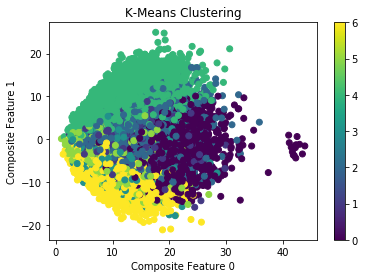

In [25]:
import matplotlib.pyplot as plt 

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(book_ratings_training[0],book_ratings_training[1],c=preds_KMeans)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Composite Feature 0')
ax.set_ylabel('Composite Feature 1')
plt.colorbar(scatter)

In the scatterplot, a few distinct clusters are visible — especially cluster 5, depicted in light green. This indicates that the clustering model was effective in grouping users based on their values for composite features 0 and 1. The scatterplot also indicates that a few users had outlier values for composite feature 0.

## Evaluation

Next, I will compare my model to the benchmark. 

The benchmark involved, for a test set of users, getting the mean rating for a randomly selected set of 10 books. Now, for each test user, I will get the 10 books the reader had read that his or her cluster rated the highest and calculate the reader's average score for those books. I will get the mean of these ratings.

Finally, I will compare the two means. 

In [26]:
# associate each test user with a cluster
test_set_preds = clusterer_KMeans.predict(book_ratings_testing)

test_set_indices = book_ratings_testing.index
test_set_clusters = pd.DataFrame(data=test_set_preds, columns=['cluster']).set_index(test_set_indices)
test_set_clusters.to_csv('clusters_pred.csv')
test_set_clusters.head()

,cluster
user_id,
13361,0
4326,0
31159,6
10579,2
30375,4


In [27]:

# train_set_preds = clusterer_KMeans.predict(book_ratings_training)

# train_set_indices = book_ratings_training.index
# train_set_clusters = pd.DataFrame(data=train_set_preds, columns=['cluster']).set_index(train_set_indices)
# # train_set_clusters.to_csv('clusters_pred.csv')
# train_set_clusters.shape

In [28]:
# test_set_clusters = test_set_clusters.append(train_set_clusters)
# test_set_clusters.shape
# test_set_clusters.to_csv('clusters_pred.csv')

In [29]:
mean_ratings_for_cluster_favorites = []

# put each cluster's sorted book list in an array to reference
cluster_favorites = [cluster0_books_storted, cluster1_books_storted, cluster2_books_storted, cluster3_books_storted, cluster4_books_storted, cluster5_books_storted, cluster6_books_storted]

# for each user, find the 10 books the reader has rated that are the top-rated books of the cluster. 
# get the reader's average score for those books
for index, row in test_set_ratings.iterrows():
    user_cluster = test_set_clusters.loc[index, 'cluster']
    favorites = cluster_favorites[user_cluster].index
    user_ratings_of_favorites = []
    # proceed in order down the cluster's list of favorite books
    for book in favorites:
        # if the user has given the book a rating, save the rating to a list
        if np.isnan(row[book]) == False:
            user_ratings_of_favorites.append(row[book])
        # stop when there are 10 ratings for the user
        if len(user_ratings_of_favorites) >= 10:
            break
    # get the mean for the user's rating of the cluster's 10 favorite books
    mean_rating_for_favorites = sum(user_ratings_of_favorites) / len(user_ratings_of_favorites)
    mean_ratings_for_cluster_favorites.append(mean_rating_for_favorites)
    
mean_favorites_rating = sum(mean_ratings_for_cluster_favorites) / len(mean_ratings_for_cluster_favorites)

print('Mean rating for 10 random books per test user: ', mean_benchmark_rating)
print('Mean rarting for 10 books that are the cluster\'s favorites: ', mean_favorites_rating)
print('Difference between ratings: ', mean_favorites_rating-mean_benchmark_rating)

Mean rating for 10 random books per test user:  3.8830410049774824
Mean rarting for 10 books that are the cluster's favorites:  4.359326854704892
Difference between ratings:  0.4762858497274096


The result: The users in the test set, on average, rated their clusters' favorite books higher than a random set of 10 books by 0.47 stars, or nearly half a star. 

This provides some evidence that the model does a better job of recommending books than if it simply picked books at random. However, it is not clear that the clustering itself provided this benefit, or if the benefit came from simply recommending books that where highly rated overall across clusters. 

## Recommender function

Finally, I will create a function to recommend a book to an individual reader. The function will cluster the reader, then recommend the highest-rated book that the user has not yet read.

In [30]:
def recommend(cluster_assignments, ratings_matrix, user_id):
    user_cluster = cluster_assignments.loc[user_id, 'cluster']
    favorites = get_cluster_favorites(user_cluster).index
    books = []
    for book in favorites:
        # check if the user's rating for the book is NaN. 
        #If so, recommend the book. Otherwise, the user has already read this book, so move on
        if np.isnan(ratings_matrix.loc[user_id, book]):
            # return book
            books.append(book)
    return books[:10]

recommendation13361 = recommend(test_set_clusters, user_book_ratings, 13361)
recommendation31159 = recommend(test_set_clusters, user_book_ratings, 31159)
recommendation10579 = recommend(test_set_clusters, user_book_ratings, 10579)
recommendation30375 = recommend(test_set_clusters, user_book_ratings, 30375)

print('Recommendation for user 13361: ', recommendation13361)
print('Recommendation for user 31159: ', recommendation31159)
print('Recommendation for user 10579: ', recommendation10579)
print('Recommendation for user 30375: ', recommendation30375)

Recommendation for user 13361:  ["It's a Magical World: A Calvin and Hobbes Collection", 'The Harry Potter Collection 1-4 (Harry Potter, #1-4)', "Fool's Fate (Tawny Man, #3)", 'Brief Lives (The Sandman #7)', 'The Kindly Ones (The Sandman #9)', 'Nothing to Envy: Ordinary Lives in North Korea', 'Harry Potter Boxset (Harry Potter, #1-7)', 'Fables and Reflections (The Sandman #6)', 'A Game of You (The Sandman #5)', "Worlds' End (The Sandman #8)"]
Recommendation for user 31159:  ['The Complete Calvin and Hobbes', 'The Calvin and Hobbes Tenth Anniversary Book', 'Saga, Vol. 2 (Saga, #2)', 'Saga, Vol. 1 (Saga, #1)', "It's a Magical World: A Calvin and Hobbes Collection", 'Words of Radiance (The Stormlight Archive, #2)', 'The Kindly Ones (The Sandman #9)', 'The Wake (The Sandman #10)', 'A Song of Ice and Fire (A Song of Ice and Fire, #1-5)', "Band of Brothers: E Company, 506th Regiment, 101st Airborne from Normandy to Hitler's Eagle's Nest"]
Recommendation for user 10579:  ["It's a Magical Worl

In [31]:
user_book_ratings.loc[13361, "The Paper Bag Princess"]

nan

In [32]:
user_book_ratings.loc[13361, "It's a Magical World: A Calvin and Hobbes Collection"] = 5

In [33]:
recommendation13361 = recommend(test_set_clusters, user_book_ratings, 13361)
print('Recommendation for user 13361: ', recommendation13361)

Recommendation for user 13361:  ['The Harry Potter Collection 1-4 (Harry Potter, #1-4)', "Fool's Fate (Tawny Man, #3)", 'Brief Lives (The Sandman #7)', 'The Kindly Ones (The Sandman #9)', 'Nothing to Envy: Ordinary Lives in North Korea', 'Harry Potter Boxset (Harry Potter, #1-7)', 'Fables and Reflections (The Sandman #6)', 'A Game of You (The Sandman #5)', "Worlds' End (The Sandman #8)", 'The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury']


In [34]:
recommendation13361 = recommend(test_set_clusters, user_book_ratings, 13361)
print('Recommendation for user 13361: ', recommendation13361)

Recommendation for user 13361:  ['The Harry Potter Collection 1-4 (Harry Potter, #1-4)', "Fool's Fate (Tawny Man, #3)", 'Brief Lives (The Sandman #7)', 'The Kindly Ones (The Sandman #9)', 'Nothing to Envy: Ordinary Lives in North Korea', 'Harry Potter Boxset (Harry Potter, #1-7)', 'Fables and Reflections (The Sandman #6)', 'A Game of You (The Sandman #5)', "Worlds' End (The Sandman #8)", 'The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury']


In [35]:
import tkinter as tk
from tkinter import font  as tkfont
from tkinter import *
from tkinter.ttk import Combobox
from tkinter import messagebox
import re

temp_book = books[['book_id', 'title']]
book_id_dict = pd.Series(temp_book.title.values,index=temp_book.book_id).to_dict()
number_match = re.compile('^\d+$')

In [36]:


# Frame Class
class SampleApp(tk.Tk):

    def __init__(self, *args, **kwargs):
        tk.Tk.__init__(self, *args, **kwargs)

        self.title_font = tkfont.Font(family='Helvetica', size=18, weight="bold", slant="italic")
        # the container is where we'll stack a bunch of frames
        # on top of each other, then the one we want visible
        # will be raised above the others
        container = tk.Frame(self)
        container.pack(side="top", fill="both", expand=True)
        container.grid_rowconfigure(0, weight=1)
        container.grid_columnconfigure(0, weight=1)

        self.frames = {}
        for F in (Option_Page, Rating_Page, Recommend_Page):
            page_name = F.__name__
            frame = F(parent=container, controller=self)
            self.frames[page_name] = frame

            # put all of the pages in the same location;
            # the one on the top of the stacking order
            # will be the one that is visible.
            frame.grid(row=0, column=0, sticky="nsew")

        self.show_frame("Option_Page")

    def show_frame(self, page_name):
        '''Show a frame for the given page name'''
        frame = self.frames[page_name]
        frame.tkraise()

In [42]:
class Option_Page(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        self.controller = controller
        # self.configure(background="black")

        frame0 = Frame(self)
        frame0.pack(fill=X)

       
       
        label = tk.Label(frame0, text="Book Recommendation\nEngine", font=controller.title_font)
        label.pack(pady=20)


        frame3 = Frame(self)
        frame3.pack(fill=X)

        rate_button = Button(frame3, text="Rate Book", height=10, width=15, command=lambda: controller.show_frame("Rating_Page"))
        rate_button.pack(side=LEFT, padx=100, pady=50)

        recommend_button = Button(frame3, text="Recommend Books", height=10, width=15, command=lambda: controller.show_frame("Recommend_Page"))
        recommend_button.pack(side=RIGHT, padx=100, pady=50)

        '''frameb = Frame(self)
        frameb.pack(fill=X)
        label2 = tk.Label(frameb, text="Made by Neha Gupta", font=controller.title_font)
        label2.pack(side=BOTTOM)'''

In [43]:
class Rating_Page(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        self.controller = controller
        self.bookname = ''
        
        frame01 = Frame(self)
        frame01.pack(fill=X)
        button = tk.Button(frame01, text="Home Page", command=self.change_page)
        button.pack(side=RIGHT, pady=10)

        frame01a = Frame(self)
        frame01a.pack(fill=X)
        label = tk.Label(frame01a, text="Welcome to the\nRating Page", font=controller.title_font)
        label.pack(pady=20)

        frame1 = Frame(self)
        frame1.pack(fill=X)
        lbl1 = Label(frame1, text="User Id", width=10)
        lbl1.pack(side=LEFT, padx=130, pady=10)           
       
        self.entry1 = Entry(frame1)
        self.entry1.pack(expand=False)

        frame2 = Frame(self)
        frame2.pack(fill=X)
        lbl2 = Label(frame2, text="Book Id", width=10)
        lbl2.pack(side=LEFT, padx=130, pady=10)        

        self.entry2 = Entry(frame2)
        self.entry2.pack(expand=False)

        frame3 = Frame(self)
        frame3.pack(fill=X)
        check_button = Button(frame3, text="Verify Books", command=self.get_bookname)
        check_button.pack(side=LEFT, padx=350)
              
    def get_bookname(self):
        if self.entry2.get() == '' or not number_match.match(self.entry2.get()):
            messagebox.showerror(title='No Valid Input', message='Please enter valid Book Id')
            return
        try:
            self.bookname = book_id_dict[int(self.entry2.get())]
            self.frame4 = Frame(self)
            self.frame4.pack(fill=X)
            lbl3 = Label(self.frame4, text="Book Name : "+self.bookname, width=100)
            lbl3.pack(side=LEFT, padx=130, pady=10) 

            self.frame5 = Frame(self)
            self.frame5.pack(fill=X)
            data=("1", "2", "3", "4", "5")
            self.cb=Combobox(self.frame5, values=data)
            self.cb.pack(side=LEFT, padx=300, pady=10) 

            self.frame6 = Frame(self)
            self.frame6.pack(fill=X)
            combo_button = Button(self.frame6, text="Rate Book", command=self.set_ratebook)
            combo_button.pack(side=LEFT, padx=350)
        except:
            messagebox.showerror(title='No Book Found', message='No book was found in the database with this id.')
        
    def change_page(self):
        try:
            self.frame4.pack_forget()
            self.frame5.pack_forget()
            self.frame6.pack_forget()
        except:
            print()
        self.controller.show_frame("Option_Page")

    def set_ratebook(self):
        if self.cb.get() == "":
            messagebox.showinfo("nothing to show!", "you have to be choose something")
        else:
            if self.entry1.get() == '' or not number_match.match(self.entry1.get()):
                messagebox.showerror(title='No Valid Input', message='Please enter valid User Id')
                return
            try:
                user_id = int(self.entry1.get())
                # print("Value is :", self.cb.get())
                # print("Before :", user_book_ratings.loc[user_id , self.bookname])
                user_book_ratings.loc[user_id, self.bookname] = int(self.cb.get())
                messagebox.showinfo("Rated Successfully", "You have rated a book")
                self.entry2.delete(0, 'end')
                # print("After :", user_book_ratings.loc[user_id, self.bookname])
            except:
                messagebox.showerror(title='No User Found', message='No user was found in the database with this id.')
        self.frame4.pack_forget()
        self.frame5.pack_forget()
        self.frame6.pack_forget()

In [44]:

class Recommend_Page(tk.Frame):

    def __init__(self, parent, controller):
        tk.Frame.__init__(self, parent)
        self.controller = controller

        frame1 = Frame(self)
        frame1.pack(fill=X)
        # user_name = StringVar()
        # name_user = Label(frame1, textvariable=user_name, font=controller.title_font)
        # name_user.pack(side=RIGHT, fill="x", pady=10)
        # user_name.set("Ayush Prasad")

        # label = tk.Label(self, text="This is page 2", font=controller.title_font)
        # label.pack(side="top", fill="x", pady=10)
        button = tk.Button(frame1, text="Home Page", command=self.change_page)
        button.pack(side=RIGHT, pady=10)

        frame1a = Frame(self)
        frame1a.pack(fill=X)
        pagelbl = Label(frame1a, text="Welcome to the \n Recommendation Page", font=controller.title_font)
        pagelbl.pack(pady=20)
        

        #frame12 = Frame(self).pack(fill=X)
        # capture_image = Button(self, text = "Capture Image", pady=50, padx=50, command = a).pack()
        # file_opener = Button(self, text = "Select Image", pady=30, padx=20, command = a).pack()
        frame1 = Frame(self)
        frame1.pack(fill=X)
        lbl1 = Label(frame1, text="User Id", width=10)
        lbl1.pack(side=LEFT, padx=150, pady=10)           
       
        self.entry1 = Entry(frame1)
        self.entry1.pack(expand=False)


        frame2 = Frame(self)
        frame2.pack(fill=X)
        check_button = Button(frame2, text="Recommend Books", command=self.get_recommendation)
        check_button.pack(side=LEFT, padx=310, pady=20)

    def get_recommendation(self):
        self.frame3 = Frame(self)
        self.frame3.pack(fill=X)
        if self.entry1.get() == '' or not number_match.match(self.entry1.get()):
            messagebox.showerror(title='No Valid Input', message='Please enter valid User Id')
            return
        try:
            recommendation_result = recommend(test_set_clusters, user_book_ratings, int(self.entry1.get()))
            self.frame3 = Frame(self)
            self.frame3.pack(fill=X)
            tbox = Text(self.frame3)
            tbox.insert(END, 'Book Id \t Book Name \n\n')
            for x in recommendation_result:
                tbox.insert(END, str(list(book_id_dict.keys())[list(book_id_dict.values()).index(x)]) + '\t\t' + x + '\n')
            tbox.pack(padx=150, pady=40)
        except:
            messagebox.showerror(title='No User Found', message='No user was found in the database with this id.')
            self.frame3.pack_forget()

    def change_page(self):
        try:
            self.frame3.pack_forget()
        except:
            print()
        self.entry1.delete(0, 'end')
        self.controller.show_frame("Option_Page")


In [45]:
def donothing():
    print("")

In [47]:
app = SampleApp()
app.geometry("800x600+600+200")
app.title('Recommendation Engine')
# app.configure(background="black")

menubar = Menu(app)
filemenu = Menu(menubar, tearoff=0)
filemenu.add_command(label="New", command=donothing)
filemenu.add_command(label="Open", command=donothing)
filemenu.add_command(label="Save", command=donothing)
filemenu.add_command(label="Save as...", command=donothing)
filemenu.add_command(label="Close", command=donothing)
filemenu.add_separator()
filemenu.add_command(label="Exit", command=donothing)
menubar.add_cascade(label="File", menu=filemenu)

app.config(menu=menubar)
app.mainloop()